In [234]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [183]:
# To read the complete file 
df = pd.read_csv('../../Datasets/credit_scoring_eng.csv')
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,masters degree,0,married,0,F,employee,0,253875.639453,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,112080.014102,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,145885.952297,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,267628.550329,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,158616.077870,to have a wedding


In [184]:
df.shape

(21525, 12)

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [186]:
df.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


In [187]:
df.columns

Index(['children', 'days_employed', 'dob_years', 'education', 'education_id',
       'family_status', 'family_status_id', 'gender', 'income_type', 'debt',
       'total_income', 'purpose'],
      dtype='object')

In [188]:
df.index

RangeIndex(start=0, stop=21525, step=1)

In [189]:
df.dtypes

children              int64
days_employed       float64
dob_years             int64
education            object
education_id          int64
family_status        object
family_status_id      int64
gender               object
income_type          object
debt                  int64
total_income        float64
purpose              object
dtype: object

In [190]:
df.isnull().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [191]:
df['children']

0        1
1        1
2        0
3        3
4        0
        ..
21520    1
21521    0
21522    1
21523    3
21524    2
Name: children, Length: 21525, dtype: int64

In [192]:
df[['children' , 'days_employed']]

,children,days_employed
0,1,-8437.673028
1,1,-4024.803754
2,0,-5623.422610
3,3,-4124.747207
4,0,340266.072047
...,...,...
21520,1,-4529.316663
21521,0,343937.404131
21522,1,-2113.346888
21523,3,-3112.481705


In [193]:
df.loc[0,'days_employed']

-8437.673027760233

In [194]:
df.iloc[0,1]

-8437.673027760233

In [195]:
new_df = df[(df['children'] == 1) & (df['days_employed']>0)]
new_df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
24,1,338551.952911,57,secondary education,1,unmarried,4,F,retiree,0,290547.235997,transactions with the residential real estate
30,1,335581.668515,62,secondary education,1,married,0,F,retiree,0,171456.067993,transactions with the residential real estate
418,1,331291.683063,59,secondary education,1,married,0,M,retiree,0,212226.270727,property renovation
501,1,335142.328662,66,secondary education,1,married,0,F,retiree,0,103505.221838,profile education
512,1,397005.475220,46,secondary education,1,married,0,F,retiree,0,191702.567680,housing transactions


In [196]:
new_df.sort_values('days_employed' ,ascending = False)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
7664,1,401675.093434,61,secondary education,1,married,0,F,retiree,0,126214.519212,housing transactions
7668,1,401226.800545,60,secondary education,1,married,0,F,retiree,0,48472.359657,to get asupplementary education
15972,1,401020.642572,53,primary education,3,widow / widower,2,F,retiree,0,165394.773567,supplementary education
12059,1,400892.431139,58,secondary education,1,married,0,M,retiree,0,178653.645947,going to university
8469,1,400124.139432,52,secondary education,1,widow / widower,2,F,retiree,0,105316.163865,purchase of the house
...,...,...,...,...,...,...,...,...,...,...,...,...
7176,1,329722.245157,46,masters degree,0,unmarried,4,F,retiree,0,352908.436525,building a real estate
19506,1,329699.348562,63,MASTERS DEGREE,0,married,0,F,retiree,0,180400.858943,real estate transactions
1461,1,329605.609434,50,secondary education,1,married,0,F,retiree,0,291945.466794,education
10905,1,329375.626729,60,secondary education,1,widow / widower,2,F,retiree,0,116407.666865,property


In [197]:
df['new_column'] = df['children']*5
df['new_column'].head()

0     5
1     5
2     0
3    15
4     0
Name: new_column, dtype: int64

In [198]:
df.drop('new_column' , axis = 1, inplace=True)

In [199]:
df.drop(range(2,3000) , axis = 0 )


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,masters degree,0,married,0,F,employee,0,253875.639453,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,112080.014102,car purchase
3000,1,-672.524930,33,secondary education,1,married,0,M,employee,0,146383.766349,buying property for renting out
3001,0,-142.442619,28,secondary education,1,married,0,M,employee,0,79012.589220,building a real estate
3002,0,NaN,28,masters degree,0,married,0,M,partner,0,NaN,buy residential real estate
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,-4529.316663,43,secondary education,1,civil partnership,1,F,partner,0,224791.862382,housing transactions
21521,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,155999.806512,purchase of a car
21522,1,-2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,89672.561153,property
21523,3,-3112.481705,38,secondary education,1,married,0,M,employee,1,244093.050500,buying my own car


In [200]:
df.index

RangeIndex(start=0, stop=21525, step=1)

In [201]:
df.fillna(0 )
df.head(2)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,masters degree,0,married,0,F,employee,0,253875.639453,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,112080.014102,car purchase


In [202]:
df.isnull().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [203]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df['days_employed'] = imputer.fit_transform(df[['days_employed']]).ravel()
df.isnull().sum()

children               0
days_employed          0
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [204]:
df.fillna(method='ffill')
df.fillna(method='bfill')
df.dropna()

C:\Users\tharu\AppData\Local\Temp\ipykernel_25472\980592759.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill')
C:\Users\tharu\AppData\Local\Temp\ipykernel_25472\980592759.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill')


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,masters degree,0,married,0,F,employee,0,253875.639453,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,112080.014102,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,145885.952297,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,267628.550329,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,158616.077870,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,-4529.316663,43,secondary education,1,civil partnership,1,F,partner,0,224791.862382,housing transactions
21521,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,155999.806512,purchase of a car
21522,1,-2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,89672.561153,property
21523,3,-3112.481705,38,secondary education,1,married,0,M,employee,1,244093.050500,buying my own car


In [205]:
from sklearn.impute import KNNImputer
imputer2 = KNNImputer(n_neighbors=5)
df['total_income'] = imputer2.fit_transform(df[['total_income']]).ravel()
df.isnull().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

In [206]:
df.head(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,masters degree,0,married,0,F,employee,0,253875.639453,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,112080.014102,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,145885.952297,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,267628.550329,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,158616.077870,to have a wedding


In [207]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
df['days_employed'] = scaler.fit_transform(df[['days_employed']]).ravel()

In [208]:
from sklearn.preprocessing import StandardScaler
scaler2 = StandardScaler()
df['total_income'] = scaler.fit_transform(df[['total_income']]).ravel()

In [209]:
from sklearn.preprocessing import Normalizer
norma = Normalizer(norm = 'l2')
df['dob_years'] = norma.fit_transform(df[['dob_years']]).ravel()

In [210]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,0.023685,1.0,masters degree,0,married,0,F,employee,0,0.103882,purchase of the house
1,1,0.034189,1.0,secondary education,1,married,0,F,employee,0,0.040720,car purchase
2,0,0.030384,1.0,Secondary Education,1,married,0,M,employee,0,0.055778,purchase of the house
3,3,0.033951,1.0,secondary education,1,married,0,M,employee,0,0.110008,supplementary education
4,0,0.853647,1.0,secondary education,1,civil partnership,1,F,retiree,0,0.061449,to have a wedding


In [211]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['gender_encoded'] = encoder.fit_transform(df[['gender']]).ravel()

C:\Users\tharu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [212]:
from sklearn.preprocessing import OneHotEncoder 
encoder2 = OneHotEncoder()
df['family_status'] = encoder.fit_transform(df[['family_status']]).ravel()

C:\Users\tharu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [213]:
from sklearn.preprocessing import OrdinalEncoder
encoder3 = OrdinalEncoder(categories = [
    'civil servant',          
    'employee',
    'partner',
    'entrepreneur',
    'retiree',
    'paternity / maternity leave',
    'student',
    'unemployed'               
]
)
df['income_type'] = encoder.fit_transform(df[['income_type']]).ravel()

C:\Users\tharu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [214]:
df.head(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,gender_encoded
0,1,0.023685,1.0,masters degree,0,2,0,F,1,0,0.103882,purchase of the house,0
1,1,0.034189,1.0,secondary education,1,2,0,F,1,0,0.040720,car purchase,0
2,0,0.030384,1.0,Secondary Education,1,2,0,M,1,0,0.055778,purchase of the house,1
3,3,0.033951,1.0,secondary education,1,2,0,M,1,0,0.110008,supplementary education,1
4,0,0.853647,1.0,secondary education,1,0,1,F,5,0,0.061449,to have a wedding,0


In [215]:
#Binning 
df['dob_years-equal'] = pd.cut(df['dob_years'] , bins = 4 , labels=['Child' , 'Adult' , 'Middle-Aged' , 'Senior'])
df['dob_years-equal'].head(5)

0    Senior
1    Senior
2    Senior
3    Senior
4    Senior
Name: dob_years-equal, dtype: category
Categories (4, object): ['Child' < 'Adult' < 'Middle-Aged' < 'Senior']

In [216]:
df.head(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,gender_encoded,dob_years-equal
0,1,0.023685,1.0,masters degree,0,2,0,F,1,0,0.103882,purchase of the house,0,Senior
1,1,0.034189,1.0,secondary education,1,2,0,F,1,0,0.040720,car purchase,0,Senior
2,0,0.030384,1.0,Secondary Education,1,2,0,M,1,0,0.055778,purchase of the house,1,Senior
3,3,0.033951,1.0,secondary education,1,2,0,M,1,0,0.110008,supplementary education,1,Senior
4,0,0.853647,1.0,secondary education,1,0,1,F,5,0,0.061449,to have a wedding,0,Senior


<Axes: xlabel='children', ylabel='Count'>

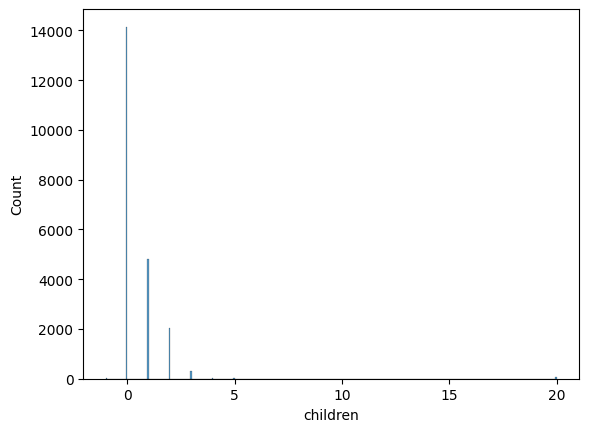

In [217]:
sns.histplot(x='children' ,data=df)

<Axes: ylabel='count'>

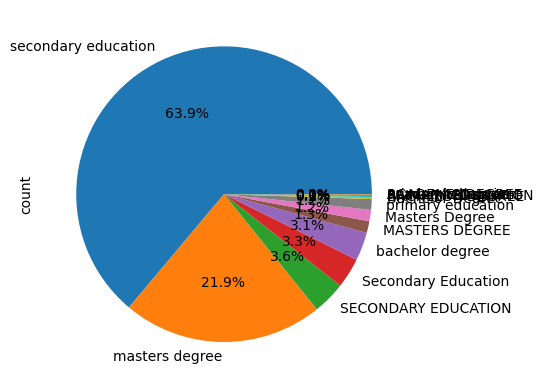

In [218]:
df['education'].value_counts().plot.pie(autopct='%1.1f%%')


<Axes: xlabel='children', ylabel='total_income'>

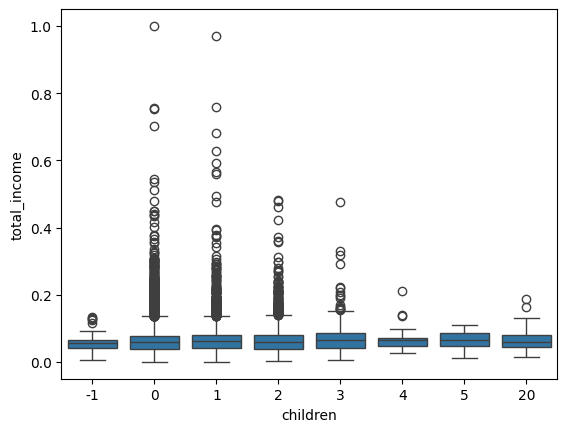

In [219]:
sns.boxplot(x='children' , y='total_income' ,data=df)

<Axes: xlabel='children', ylabel='total_income'>

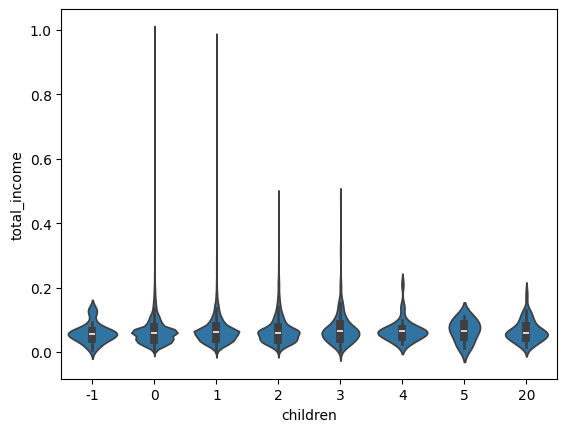

In [220]:
sns.violinplot(x='children' , y='total_income' ,data=df)

<Axes: xlabel='total_income', ylabel='days_employed'>

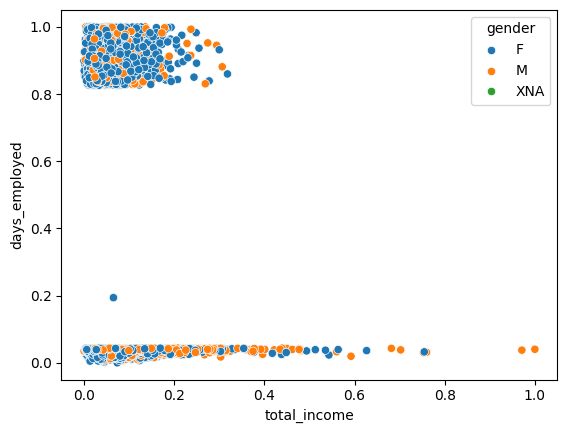

In [221]:
sns.scatterplot(x='total_income' , y='days_employed' , data=df , hue = 'gender')

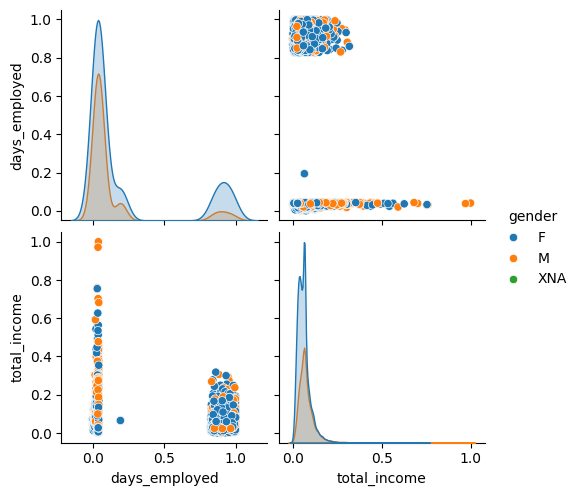

In [222]:
sns.pairplot(df[['gender' , 'days_employed' , 'total_income']] , hue= 'gender')

<Axes: >

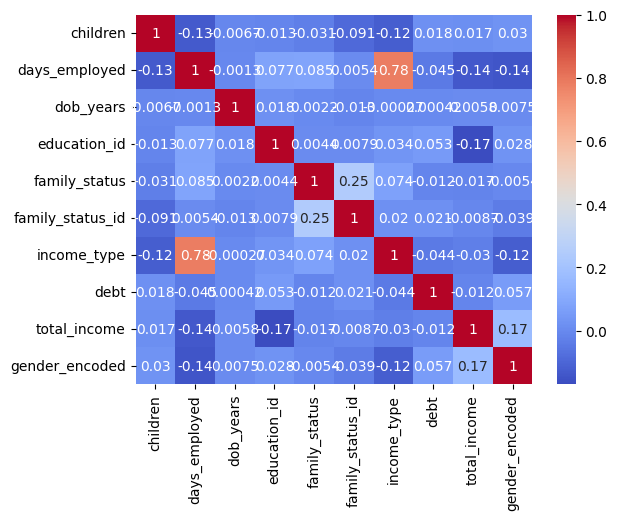

In [223]:

df_new = df.select_dtypes(include = ['number'])
corr = df_new.corr()
sns.heatmap(corr , annot = True , cmap = 'coolwarm')

In [224]:
data = []

with open('../../Datasets/output.csv' , 'r') as f :
    lines = f.readlines()
    for line in lines :
        data.append(line.strip().split(','))
new_df = pd.DataFrame(data)
df.head(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,gender_encoded,dob_years-equal
0,1,0.023685,1.0,masters degree,0,2,0,F,1,0,0.103882,purchase of the house,0,Senior
1,1,0.034189,1.0,secondary education,1,2,0,F,1,0,0.040720,car purchase,0,Senior
2,0,0.030384,1.0,Secondary Education,1,2,0,M,1,0,0.055778,purchase of the house,1,Senior
3,3,0.033951,1.0,secondary education,1,2,0,M,1,0,0.110008,supplementary education,1,Senior
4,0,0.853647,1.0,secondary education,1,0,1,F,5,0,0.061449,to have a wedding,0,Senior


In [ ]:
import json
from pandas import json_normalize
with open('../../Datsets/new.json' ) as f :
    data = json.load(f)
new_df = json_normalize(data)

<Axes: xlabel='total_income'>

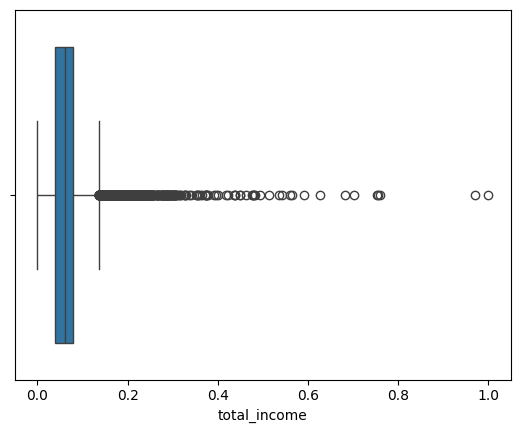

In [ ]:
# Outliers Detection
sns.boxplot(x='total_income' , data = df)

In [230]:
# IQR Method 
Q1 = df['total_income'].quantile(0.25)
Q3 = df['total_income'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
outliers = df[(df['total_income']<lower_bound) | (df['total_income']>upper_bound)]
outliers.shape

(1131, 14)

In [232]:
#Z-Score
mean = df['total_income'].mean()
std = df['total_income'].std()
z_scores = []
for i in df['total_income'] :
    z_scores.append((i-mean)/std)

df['z_score'] = z_scores
outliers_z = df[df['z_score'].abs() > 3]
outliers_z.shape

(310, 15)

In [235]:
# Handling Outliers
df['total_income'] = np.log(df['total_income']+1)

In [236]:
median_val =df['total_income'].median()
df.loc[(df['total_income'] > upper_bound) |
(df['total_income'] < lower_bound),
'total_income'] = median_val

In [238]:
lower_cap = df['total_income'].quantile(0.05)
upper_cap = df['total_income'].quantile(0.95)
df['total_income'] = np.where(df['total_income']<lower_cap , lower_cap , df['total_income'])
df['total_income'] = np.where(df['total_income']>upper_cap , upper_cap , df['total_income'])